In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ¿Que es una distribución? 

Una distribución es una función que muestra los posibles valores de una variable y la probabilidad de que se produzcan.

## Tipos de distribuciones

### Exponencial

In [4]:
#Explicación

In [ ]:
#code (Muestra grafica)

### Poisson

In [ ]:
#Explicación

In [ ]:
#code (Muestra grafica)

### Normal

**Definición**

La distribución normales una de las distribuciones de probabilidad de variable continua más frecuentes en estadística y en la teoría de probabilidades.​

La gráfica de su función de densidad tiene una forma acampanada y es simétrica respecto de un determinado parámetro estadístico. Esta curva se conoce como campana de Gauss y es el gráfico de una función gaussiana. El nombre de Gauss se ha asociado a esta distribución porque la usó muchísimo cuando analizaba datos astronómicos.

La importancia de esta distribución radica en que permite modelar numerosos fenómenos naturales, sociales y psicológicos. ​Mientras que los mecanismos que subyacen a gran parte de este tipo de fenómenos son desconocidos, por la enorme cantidad de variables incontrolables que en ellos intervienen, el uso del modelo normal puede justificarse asumiendo que cada observación se obtiene como la suma de unas pocas causas independientes.

Algunos ejemplos de variables asociadas a fenómenos naturales que siguen el modelo de la normal son:

- caracteres morfológicos de individuos como la estatura
- caracteres fisiológicos como el efecto de un fármaco
- caracteres sociológicos como el consumo de cierto producto por un mismo grupo de individuos
- fenómenos fisico-químicos como la velocidad de una reacción química

**Representadicón gráfica**

Veamos representaciones de las distribuciones normales aumentando el número de observaciones.
Cuantos más observaciones, más se acercará a una campana de Gauss.

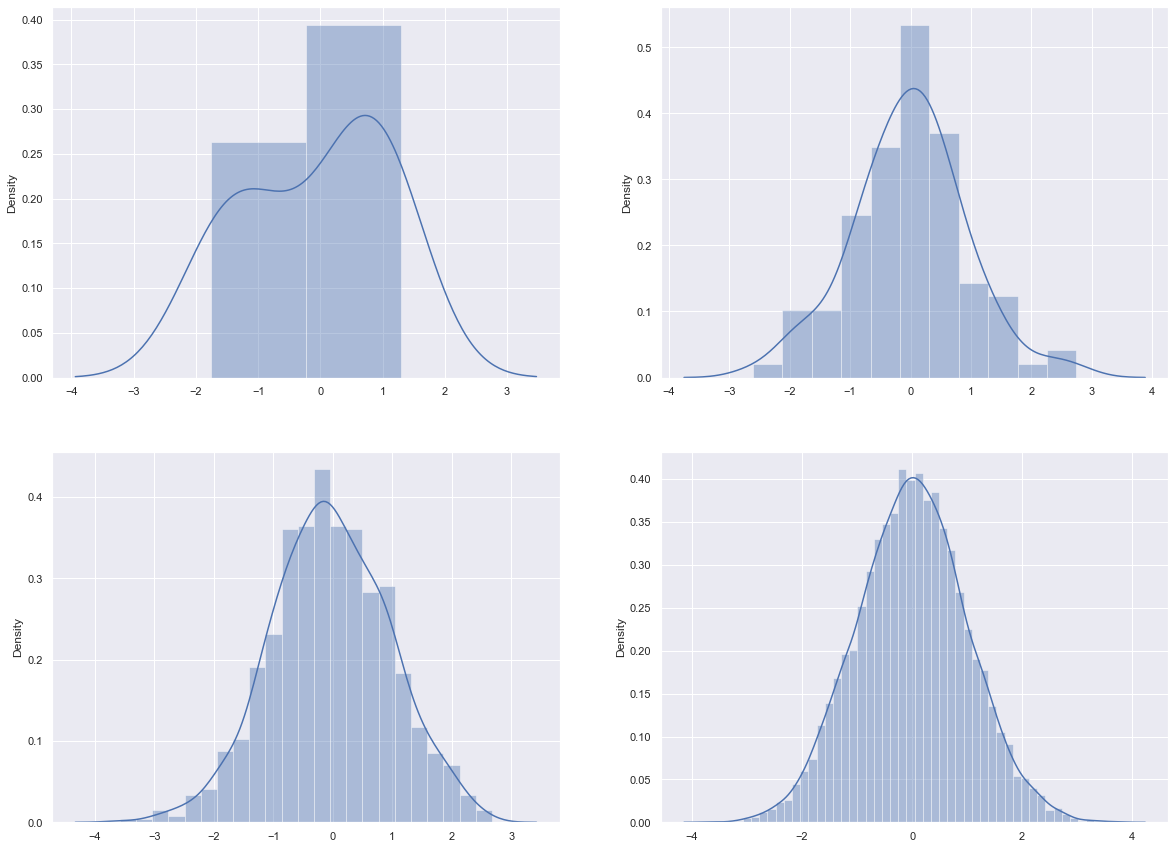

In [119]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))

sns.distplot(np.random.normal(0,1,10), ax = axes[0,0])
sns.distplot(np.random.normal(0,1,100), ax = axes[0,1])
sns.distplot(np.random.normal(0,1,1000), ax = axes[1,0])
sns.distplot(np.random.normal(0,1,10000), ax = axes[1,1])
plt.show()

Vale pero, ¿esto pa qué?
Vamos a ver un ejemplo de una variable asociada a un fenómeno natural. Usaremos el data frame de florecitas que nos ha pasado la profe.

In [ ]:
df = pd.read_csv('iris.csv', index_col = 0)

In [46]:
df.head(1)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa


Veamos cómo está distribuida la longitud de los pétalos de las flores de iris, tomandonos la licencia de asumir que todas las flores son de la misma vaiedad o lo que es lo mismo, vamos a estudiarlas como especie.

<AxesSubplot:xlabel='petal.length', ylabel='Density'>

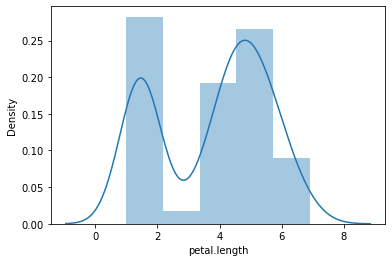

In [48]:
sns.distplot(df['petal.length'])

Vaya, hay dos picos. ¿Y esto por qué? ¿Ha sido fruto de la casualidad al recoger la muestra? El Amado Líder quiere vender las flores y no sé a qué atenerme. Veamos la media de la longitud de los pétalos:

In [88]:
df['petal.length'].mean()

3.7580000000000027

Vale, la media se acerca al segundo pico, pero esto no nos permite conocer la distribución de la variable. Con el objetivo de poder tomar una decisión respecto a las flores, para saber cuál es el tamaño más probable que tendrán cuando las vendamos, el Amado Líder nos pide con la amorosa firmeza condescendiente que le caracteriza que tomemos 50.000 muestras de 5 flores y saquemos la media del tamaño de los pétalos para cada una de ellas.

In [91]:
medias = []

for i in range(50000):
    medias.append(round(df['petal.length'].sample(n=4).mean(), 2))

Ya tenemos las muestas, veamos la media de medias.

In [93]:
np.mean(medias)

3.7513604

Como era de esperar, la media de las medias es muy similar a la media de la columna. Veamos cómo es su distribución:

<AxesSubplot:ylabel='Density'>

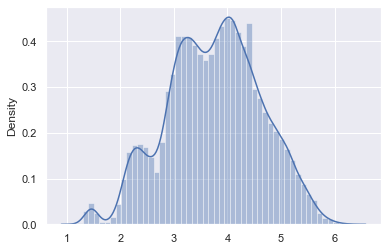

In [127]:
sns.distplot(medias)

¡¡¡TADAAAAAA!!! La distribución a cambiado. Lo que tenemos ahora se acerca mucho más a una campana de Gauss, es de hecho una representación de la desviación estándar.
Se aprecian varios picos, ¿será que hay varias variedades dentro de esta especie?... Lo importante es que el Amado Líder ya puede tomar una buena decisión respecto a las flores.

### Escala logaritmica

**Definición**

Una escala logarítmica no es un tipo de distribución, si no una manera de organizar los datos que utiliza el logaritmo de una cantidad física en lugar de la propia cantidad. Se podría aplicar a cualquier función.

Un ejemplo sencillo de escala logarítmica muestra divisiones igualmente espaciadas en el eje vertical de un gráfico marcadas con 1, 10, 100, 1000, …, en vez de 0, 1, 2, 3, …

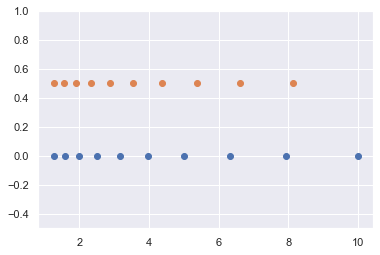

In [138]:
N = 10
x1 = np.logspace(0.1, 1, N, endpoint=True)
x2 = np.logspace(0.1, 1, N, endpoint=False)
y = np.zeros(N)
plt.plot(x1, y, 'o')
plt.plot(x2, y + 0.5, 'o')
plt.ylim([-0.5, 1])

plt.show()

Vale, ¿y esto pa qué? Pues es especialmente útil para representar la evolución temporarl de una variable.
El Amado Líder quiere saber si la gente está comprando las florecitas con entusiasmo, como él había ordenado en su infinita y bondadosa sabiduría, porque si es así será necesario ampliar la producción. Para poder tomar esa decisión le pide un estudio a su ministro de economía y Kim Tu Il le presenta el siguiente gráfico.

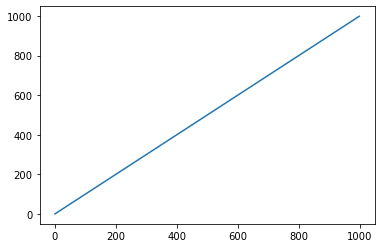

In [3]:
fig1 = sns.lineplot(data=range(1000))

Entusiasmado con el crecimiento en la demanda, el Amado Líder ordena aumentar la producción, pero cuando visita los campos de flores donde, con excelsa condescendencia, envía a los incautos que se han dejado infectar por la decadencia capitalista, descubre miles de flores pudriéndose. "¿Qué pasa?", pregunta dignamente encolerizado, "que no hay demanda Excelencia", contesta el encargado de la plantación, "en Pionyang les sobra producción". Tras comprobar que es cierto lo que le dice el encargado, Kim Tu Il aparece públicamente por última vez en la televisión y confiesa que en su último viaje a Japón vio la Mtv en el hotel y se convirtió en un sucio gusano indigno de vivir bajo el sapientísimo mando del Amado Líder, tras lo cuál el recuerdo de su existencia es borrado de todos los documentos ofiicales y se prohíbe pronunciar su nombre. 

O Su Yong es nombrado ministro de economía por el Amado Líder. O no ha sido infectado por el virus de occidente y aborda el problema e otro modo. Viendo los datos se da cuenta de que el primer día el comisario político fua a comprar flores y aconsejó a su vecino que lo imitase, así que al día siguiente 2 personas compraron flores, pero sólo el comisario político siguó recomendando la floristería estatal a una persona al día, de forma que al tercer día fueron 3, el cuarto 4, etc. Esto significa que el primer día las ventas aumentaron un 100%, el segundo día un 50% y el tercero un 33.3%, el cuarto un 25%, el quito un 20%... Y así sucesivamente hasta que la demanda quedó estancada, habiendo aumentado un 0.1% el día que el Amado Líder visitó los gloriosos campos de flores socialistas.
¿Cómo representar este ritmo de crecimiento el la demanda? O Su Yong decide que lo mejor va a ser utilizar una escala logarítmica para visualizar el estancamiento.

[None]

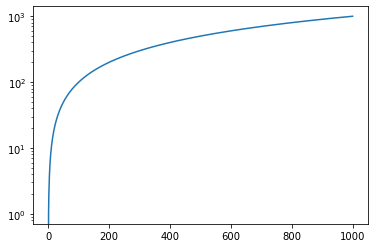

In [2]:
fig1 = sns.lineplot(data=range(1000))
fig1.set(yscale='log')


Tras esta satisfactoria explicación, el Amado Líder le pide a su ministro que calcule cuánto tiempo llevaría que los 2.87 millones de habitantes de Pionyang comprasen flores si la demanda crece un 100% cada día, es decir, que el primero va 1, el segun do 2, el tercero 8, el cuarto 16... Es un problema de tipo a*b^^x = y donde 'a' es el número inicial, 'b' la tasa de crecimiento, 'x' el número de días y 'y' el número final. Es decir, que x es igual al logaritmo de 'y' en base 'a*b'.

In [7]:
dias = math.log(2870000, 2)
dias

21.452619306225138

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304]


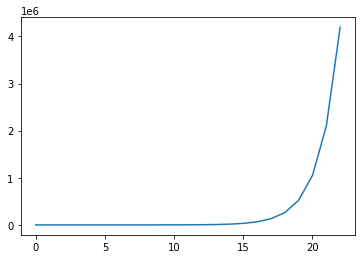

In [15]:
camaradas = []
for i in range(23):
    x = pow(2, i)
    camaradas.append(x)
print(camaradas)
fig1 = sns.lineplot(data=camaradas)

¿Y qué pasa si le aplicamos una escala logarítmica al eje y? Que el Amado Líder puede comprobar con orgullo y satisfacción que el crecimiento se mantiene constante

[None]

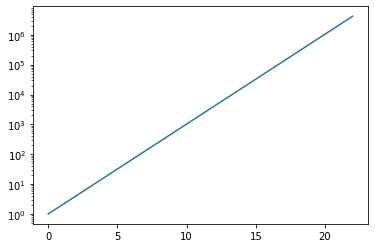

In [16]:
fig1 = sns.lineplot(data=camaradas)
fig1.set(yscale='log')